# Import libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Load data

In [107]:
name = 'https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv'
data = pd.read_csv(name)

# Size of dataframe data

In [ ]:
data.shape

(500, 2)

# Visualize data

In [ ]:
data.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


# Create x and y dataframes

In [108]:
x = data['Temperature']
y = data['Revenue']

# Scatter plot

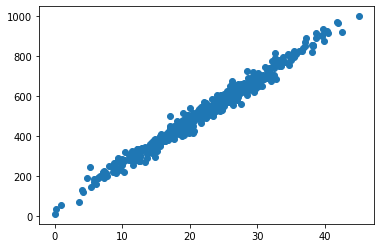

In [ ]:
plt.scatter(x, y)

# Histogram plot

(array([ 2.,  1.,  0.,  0.,  3.,  3.,  3.,  5.,  6.,  7.,  8.,  8., 10.,
        15.,  8.,  9., 13., 11., 13., 17., 22., 25., 21., 16., 27., 17.,
        19., 26., 22., 20., 21., 19., 18., 16., 10., 10., 10.,  5.,  5.,
         7.,  3.,  3.,  6.,  2.,  4.,  0.,  2.,  1.,  0.,  1.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ,
         9.9, 10.8, 11.7, 12.6, 13.5, 14.4, 15.3, 16.2, 17.1, 18. , 18.9,
        19.8, 20.7, 21.6, 22.5, 23.4, 24.3, 25.2, 26.1, 27. , 27.9, 28.8,
        29.7, 30.6, 31.5, 32.4, 33.3, 34.2, 35.1, 36. , 36.9, 37.8, 38.7,
        39.6, 40.5, 41.4, 42.3, 43.2, 44.1, 45. ]),
 <a list of 50 Patch objects>)

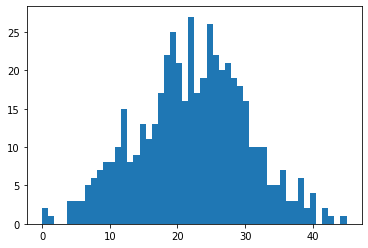

In [ ]:
plt.xlabel("x")
plt.ylabel("count")
plt.title('x histogram')
plt.hist(x, bins = 50)

(array([ 1.,  1.,  1.,  1.,  0.,  1.,  2.,  1.,  3.,  6.,  8.,  7.,  6.,
        16., 12., 12., 11.,  8., 16., 14., 17., 14., 20., 22., 24., 22.,
        29., 18., 20., 24., 20., 20., 29., 11., 20.,  7.,  6.,  9.,  6.,
         5.,  8.,  4.,  4.,  2.,  3.,  3.,  3.,  0.,  2.,  1.]),
 array([  10. ,   29.8,   49.6,   69.4,   89.2,  109. ,  128.8,  148.6,
         168.4,  188.2,  208. ,  227.8,  247.6,  267.4,  287.2,  307. ,
         326.8,  346.6,  366.4,  386.2,  406. ,  425.8,  445.6,  465.4,
         485.2,  505. ,  524.8,  544.6,  564.4,  584.2,  604. ,  623.8,
         643.6,  663.4,  683.2,  703. ,  722.8,  742.6,  762.4,  782.2,
         802. ,  821.8,  841.6,  861.4,  881.2,  901. ,  920.8,  940.6,
         960.4,  980.2, 1000. ]),
 <a list of 50 Patch objects>)

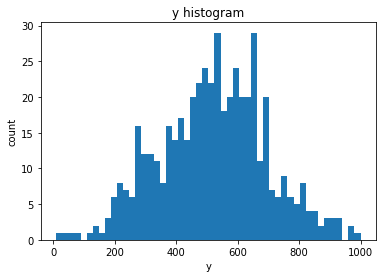

In [ ]:
plt.xlabel("y")
plt.ylabel("count")
plt.title('y histogram')
plt.hist(y, bins = 50)

# Train-Test split

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

# Create node class

In [110]:
class Node():
  '''
  1) Definition: This class is used to implement a node of the tree

  2) Usage: This class is used in create_node() function of Tree() class
  '''

  def __init__(self, 
               x: pd.Series, 
               y: pd.Series, 
               min_samples_split: int,
               node_ID: int, 
               position: str, 
               parent_node_ID: int):

    self.x = x
    self.y = y
    self.min_samples_split = min_samples_split
    self.node_ID = node_ID
    self.position = position
    self.parent_node_ID = parent_node_ID

  def get_node_ID(self) -> int:
    '''
    1) Definition: Function used to get ID of the node
      
    2) Input: None

    3) Output:
            node_ID: ID of the node
    '''

    return self.node_ID

  def split_node(self) -> bool:
    '''
    1) Definition: Function used to determine if we need to split the node
      
    2) Input: None

    3) Output:
            self.min_samples_split <= len(x) = True --> Split node into children nodes
            self.min_samples_split <= len(x) = False --> Do not split node into children nodes
    '''

    return self.min_samples_split <= self.x.shape[0]

  def get_residuals(self) -> dict:
    '''
    1) Definition: Function used to determine the residual from 
       the Decision Tree model. We need to decide which rule will be applied to each leaf. 
       This is done by testing every x in the features dataframe and calculating the 
       residuals. We must choose the x which results in the smallest residual
      
    2) Input: None

    3) Output:
            residuals: Dictionary cotainig each x and its residual
    '''

    # Create residuals dict

    residuals = dict()

    # Begin process

    for index in self.x.index:

      # Get index

      if index + 1 in self.x.index:
        target = (self.x.loc[index] + self.x.loc[index + 1]) / 2
      
      else:
        target = self.x.loc[index]
        
      #index = self.x[self.x <= target].index[-1]
      index = self.x.loc[lambda x: x <= target].index[-1]

      # Select data for y before y[index]
  
      y_before = self.y.loc[self.y.index[0] : index].values
      y_mean_before = np.mean(y_before)

      # Select data for y after y[index]

      #y_after = self.y.loc[index + 1 : ].values
      y_after = self.y.loc[index : ].values
      y_mean_after = np.mean(y_after)

      # Residuals

      residuals_before = sum([(j - y_mean_before)**2 for j in y_before])
      residuals_after = sum([(j - y_mean_after)**2 for j in y_after])
      residual = residuals_before + residuals_after

      # Add data to residuals dict

      residuals[self.x.loc[index]] = residual

    return residuals

  def get_min_residual(self) -> float:
    '''
    1) Definition: Function used to determine min_x that causes the minimal residual
       This functions uses the get_residuals() function

    2) Input: None

    3) Output:
            min_x: x in x dataframe that results in smallest residual
    '''

    # Find minimal residual

    residuals = self.get_residuals()
    min_residual_value = min(residuals.values())
    min_residual_index = list(residuals.values()).index(min_residual_value)

    # Find x that causes minimal residual

    min_x = list(residuals.keys())[min_residual_index]

    return min_x

  def get_children_data(self):
    '''
    1) Definition: Function used to determine x and y dataframes for children node

    2) Input: None

    3) Output:
            x_left: x dataframe for the left child node
            y_left: y dataframe for the left child node 
            x_right: x dataframe for the right child node 
            y_right: y dataframe for the right child node
    '''

    # Perform residual analysis on node

    min_x = self.get_min_residual()

    # Select data before y[min_residual_index]

    x_left = self.x.loc[lambda x : x <= min_x]
    y_left = self.y.loc[x_left.index]

    # Select data after y[min_residual_index]

    x_right = self.x.loc[lambda x : x > min_x]
    y_right = self.y.loc[x_right.index]

    return x_left, y_left, x_right, y_right



# Create tree class

In [111]:
class Tree():
  '''
  1) Definition: This class is used to implement a tree of nodes
  '''

  def __init__(self, min_samples_split: int):

    self.nodes_dataframe = pd.DataFrame() # This dataframe will store data form all nodes
    self.min_samples_split = min_samples_split

  def create_node(self, 
                  node_data: list, 
                  node_ID: int, 
                  position: str, 
                  parent_node_ID: int):
    '''
    1) Definition: This function is used to create nodes
      
    2) Input:
            node_data: List containing [x, y] data for the node
                       type(x) = pd.Series, type(y) = pd.Series

            node_ID: Node identification
            position: Position of the node in the tree (root, left or right)
            parent_node_ID: Identification of the parent node used to create this node

    3) Output: 
            node: Node created with Node() class
    '''

    # Create node

    x = node_data[0]
    y = node_data[1]
    node = Node(x, y, self.min_samples_split, node_ID, position, parent_node_ID)

    # Get desicion_rule for the node

    decision_rule = node.get_min_residual() if node.split_node() else None

    # Add node data to nodes_dataframe

    row_to_add = {'node_ID': node_ID, 
                  'position': position, 
                  'parent_node_ID': parent_node_ID, 
                  'split_node': node.split_node(),
                  'decision_rule': decision_rule,
                  'len(x)': len(x),
                  'y_mean': np.mean(y)}

    self.nodes_dataframe = self.nodes_dataframe.append(row_to_add, ignore_index=True)

    return node

  def predict(self, x_test: list) -> pd.DataFrame:
      '''
      1) Definition: This is used to predict outputs for x_test
        
      2) Input:
              x_test: List of data used to make predictions

      3) Output:
              y_prediction: DataFrame showing x_test and its prediction
      '''

      y_prediction = pd.DataFrame()

      for x in x_test:
        node_path = [1] # This list contains the node path we must follow

        for node_ID in node_path:
          decision_rule = tree.nodes_dataframe[tree.nodes_dataframe['node_ID'] == node_ID]['decision_rule'].iloc[0]
          split_node = tree.nodes_dataframe[tree.nodes_dataframe['node_ID'] == node_ID]['split_node'].iloc[0]

          if split_node:
            position = 'left' if x <= decision_rule else 'right'

            next_node_ID = tree.nodes_dataframe[(tree.nodes_dataframe['parent_node_ID'] == node_ID) 
                                          & (tree.nodes_dataframe['position'] == position)]['node_ID'].iloc[0]


            node_path.append(next_node_ID) # This is the next node we must follow

          else:
            prediction = tree.nodes_dataframe[tree.nodes_dataframe['node_ID'] == node_ID]['y_mean'].iloc[0]

            row_to_add = {'x_test': x,
                          'prediction': prediction}
            
            y_prediction = y_prediction.append(row_to_add, ignore_index=True)
            break

      return y_prediction

  def grow_tree(self, node_data = None, nodes = None):
    '''
    1) Definition: This is used to create the tree
      
    2) Input:
            node_data: List containing [x, y] data for the node used in create_node() function
                       type(x) = pd.Series, type(y) = pd.Series

            nodes: List of nodes created with Node() class

    3) Output: None
    '''

    # Create root node if nodes is empty

    if not nodes:

      # Create root node

      node_ID = 1
      position = 'root'
      parent_node_ID = 1
      node = self.create_node(node_data, node_ID, position, parent_node_ID)
      nodes = [node]

    # Create other nodes

    # Create list that will receive children nodes
    
    children_nodes = list()

    for node in nodes:
    
      # Check if node needs to be split

      split_node = self.nodes_dataframe[self.nodes_dataframe['node_ID'] == node.get_node_ID()]['split_node']
      split_node = split_node.iloc[0]

      if split_node:

        # Get children data
        
        x_left, y_left, x_right, y_right = node.get_children_data()

        # Parent node ID

        parent_node_ID = node.get_node_ID()

        # Create left node

        node_ID = self.nodes_dataframe['node_ID'].iloc[-1] + 1 # Add 1 to last node_ID in nodes_dataframe
        position = 'left'
        node_data = [x_left, y_left]
        left_node = self.create_node(node_data, node_ID, position, parent_node_ID)

        # Create right node

        node_ID = self.nodes_dataframe['node_ID'].iloc[-1] + 1 # Add 1 to last node_ID in nodes_dataframe
        position = 'right'
        node_data = [x_right, y_right]
        right_node = self.create_node(node_data, node_ID, position, parent_node_ID)

        # Append nodes to nodes list

        children_nodes.extend([left_node, right_node])

        # Apply recursion for growing the tree

        self.grow_tree(nodes = children_nodes)


# Create model

In [128]:
# OBS
# My model works with recursion, and Python has a limit of stack depth (by default is 1000) for recursion
# This means that the code will stop if we exceed this limit, and we can increase this limit with
# import sys
# sys.setrecursionlimit(1000)

min_samples_split = 45
node_data = [x_train, y_train]
tree = Tree(min_samples_split)
tree.grow_tree(node_data)

# Show nodes dataframe

In [129]:
tree.nodes_dataframe.head(10)

,node_ID,position,parent_node_ID,split_node,decision_rule,len(x),y_mean
0,1.0,root,1.0,1.0,25.227774,350.0,525.786344
1,2.0,left,1.0,True,13.112452,217.0,419.197772
2,3.0,right,1.0,True,28.993737,133.0,699.694013
3,4.0,left,2.0,True,9.073838,55.0,254.126632
4,5.0,right,2.0,True,13.301796,162.0,475.240443
5,6.0,left,4.0,False,None,23.0,194.571704
6,7.0,right,4.0,False,None,32.0,296.931736
7,8.0,left,5.0,False,None,1.0,335.815687
8,9.0,right,5.0,True,20.971153,161.0,476.106435
9,10.0,left,9.0,True,17.690032,90.0,425.443895


# Make predictions

In [130]:
prediction_my_model = tree.predict(x_test)
prediction_my_model.head(10)

,x_test,prediction
0,32.805033,811.881868
1,32.107080,811.881868
2,28.900192,648.534946
3,31.471224,811.881868
4,18.775358,460.646818
5,21.601892,526.782597
6,15.661464,382.573466
7,11.177152,296.931736
8,32.004365,811.881868
9,23.984641,568.902382


# Create model using sklearn

In [131]:
# Create model

model = DecisionTreeRegressor(criterion = 'squared_error', min_samples_split = 50)

# Fit model

x1 = x_train.values
y1 = y_train.values
model.fit(x1.reshape(-1,1), y1.reshape(-1,1))



DecisionTreeRegressor(min_samples_split=50)

# Make predictions with sklearn

In [132]:
prediction_sklearn = model.predict(pd.DataFrame(x_test))
data = {'x_test': x_test, 'prediction': prediction_sklearn}
prediction_sklearn = pd.DataFrame(data = data)
prediction_sklearn.head(10)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,x_test,prediction
167,32.805033,811.881868
169,32.107080,811.881868
461,28.900192,673.679363
253,31.471224,811.881868
42,18.775358,403.756083
369,21.601892,504.872824
26,15.661464,403.756083
377,11.177152,305.928234
238,32.004365,811.881868
374,23.984641,579.155543


# Compare predictions results

In [133]:
prediction_comparisson = prediction_my_model.merge(prediction_sklearn, 
                                                   on = 'x_test', 
                                                   how = 'inner', 
                                                   suffixes=('_my_model', '_sklearn'))


prediction_comparisson['relative_error'] = 100 * (abs(prediction_comparisson['prediction_sklearn'] - prediction_comparisson['prediction_my_model'])) / prediction_comparisson['prediction_sklearn']
prediction_comparisson.head(10)

,x_test,prediction_my_model,prediction_sklearn,relative_error
0,32.805033,811.881868,811.881868,0.000000
1,32.107080,811.881868,811.881868,0.000000
2,28.900192,648.534946,673.679363,3.732401
3,31.471224,811.881868,811.881868,0.000000
4,18.775358,460.646818,403.756083,14.090372
5,21.601892,526.782597,504.872824,4.339662
6,15.661464,382.573466,403.756083,5.246389
7,11.177152,296.931736,305.928234,2.940722
8,32.004365,811.881868,811.881868,0.000000
9,23.984641,568.902382,579.155543,1.770364


# Metrics on relative_error

In [134]:
relative_error_mean = round(prediction_comparisson['relative_error'].mean(), 2)
relative_error_median = round(prediction_comparisson['relative_error'].median(), 2)
relative_error_std = round(prediction_comparisson['relative_error'].std(), 2)

print(f'relative_error_mean = {relative_error_mean}')
print(f'relative_error_median = {relative_error_median}')
print(f'relative_error_std = {relative_error_std}')

relative_error_mean = 3.94
relative_error_median = 2.64
relative_error_std = 5.07
